## Final Project Submission

Please fill out:
* Student name: Seun Princess Otusanya
* Student pace: Self Paced
* Scheduled project review date/time: Friday, September 25. 5:30PM
* Instructor name: Jeff Herman
* Blog post URL: https://princess-1.github.io/why_did_i_decide_to_study_data_science


## Data Cleaning and EDA

In [1]:
# Import libraries
import sqlite3

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Connect to database and create cursor
conn = sqlite3.connect('movies_db.sqlite')
cur = conn.cursor()

In [3]:
# Print out table names
cur.execute('''SELECT name
               FROM sqlite_master
               WHERE type='table';
               ''').fetchall()

[('tmdb_movies',),
 ('tn_movie_budgets',),
 ('imdb_name_basics',),
 ('title_akas',),
 ('bom_movie_gross',),
 ('imdb_title_basics',),
 ('title_ratings',),
 ('rt_reviews',),
 ('rt_movie_info',)]

### tmdb_movies_df - Data Cleaning and EDA

In [4]:
# I'm choosing to convert all my tables to Dataframes because I feel it will be easier to work with
tmdb_movies_df = pd.read_sql('''SELECT *
                                FROM tmdb_movies''', conn)
tmdb_movies_df.head()

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# Set 'Index' as the datasets index
tmdb_movies_df.set_index('index', inplace=True)
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
index,,,,,,,,,
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
# Check df shape to see how many rows and columns we have
print(tmdb_movies_df.shape)

# View info for each column
tmdb_movies_df.info()

(26517, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [7]:
# Check for null values if any
print(tmdb_movies_df.isnull().sum())

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [8]:
# It appears we don't have any null value -not any we can see right now at least-
# We'll explore the dataset further by checking out the Unique values
print('Number of Unique values:\n', tmdb_movies_df.nunique())

Number of Unique values:
 genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64


In [9]:
# Going off the original_title and title columns its safe to assume there are some duplicate
tmdb_movies_df[tmdb_movies_df.duplicated(keep=False)].sort_values(by='title')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
index,,,,,,,,,
9191,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12
6315,[99],95383,en,$ellebrity,1.420,2013-01-11,$ellebrity,5.6,12
20070,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
26340,"[99, 36, 10770]",430364,en,'85: The Greatest Team in Pro Football History,0.600,2018-01-29,'85: The Greatest Team in Pro Football History,7.5,2
18016,"[18, 10749]",416691,en,1 Night,5.409,2017-02-10,1 Night,6.4,107
...,...,...,...,...,...,...,...,...,...
21273,[18],326382,es,Zama,5.671,2017-09-30,Zama,6.9,50
15061,"[10751, 16]",94196,fr,Zarafa,2.705,2012-11-11,Zarafa,6.8,39
5888,"[10751, 16]",94196,fr,Zarafa,2.705,2012-11-11,Zarafa,6.8,39


In [10]:
# We'll delete the duplicates as part of our data cleaning process
tmdb_movies_df.drop_duplicates(subset=['title'], inplace=True)

In [11]:
# Check to make sure changes were made to the dataset
tmdb_movies_df[tmdb_movies_df.duplicated(keep=False)].sort_values(by='title')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
index,,,,,,,,,


In [12]:
# Now that our data is clean we can proceed to some light EDA
# Going back to the columns datatype we can see that release_date is stored as an object
print(tmdb_movies_df.dtypes)

# That can be fixed by changing it to a datetime dtype
# We can clearly see the before and after below
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])
tmdb_movies_df.info()

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24688 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            24688 non-null object
id                   24688 non-null int64
original_language    24688 non-null object
original_title       24688 non-null object
popularity           24688 non-null float64
release_date         24688 non-null datetime64[ns]
title                24688 non-null object
vote_average         24688 non-null float64
vote_count           24688 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.9+ MB


In [13]:
# Create a two new column release_month and release_day
# release_month
tmdb_movies_df['release_month'] = tmdb_movies_df['release_date'].dt.strftime('%B')
tmdb_movies_df.head()

# release_day
tmdb_movies_df['release_day'] = tmdb_movies_df['release_date'].dt.strftime('%A')
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,release_day
index,,,,,,,,,,,
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,November,Friday
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,March,Friday
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,May,Friday
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,November,Wednesday
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,July,Friday


### budget_df Cleaning and EDA

In [14]:
# Convert sql table to pandas dataframe
budget_df = pd.read_sql('''SELECT *
                                FROM tn_movie_budgets''', conn)
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
# Set 'id' column as index
budget_df.set_index('id', inplace=True)

In [16]:
# Check for null values
budget_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [17]:
# Check for duplicates
budget_df[budget_df.duplicated(keep=False)].sort_values(by='movie')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,


In [18]:
# Check data structure
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [19]:
# Looking at the datatypes the last 3 columns are stored as an object datatype 
# We'll be converting the last 3 columns to Integer datatypes

# production_budget
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$','').str.replace(',','').astype('int')

# domestic_gross
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('$','').str.replace(',','').astype('int')

# worldwide_gross
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype('int')

In [20]:
# Confirm changes
print(budget_df.info())
budget_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(3), object(2)
memory usage: 271.0+ KB
None


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [21]:
# Convert release_date from object dtype to datetime dtype
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

In [22]:
# Confirm change
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


In [23]:
# Create column for release_year
from datetime import datetime
budget_df['release_year'] = budget_df['release_date'].dt.year
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [24]:
# Create another column for movie profit
budget_df['profit'] = ((budget_df['worldwide_gross'] + budget_df['domestic_gross']) - budget_df['production_budget'])
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,3111852904
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,876127750
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-157475300
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1531419831
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1619903129


### Has the profits on movies increased or decreased over the years?

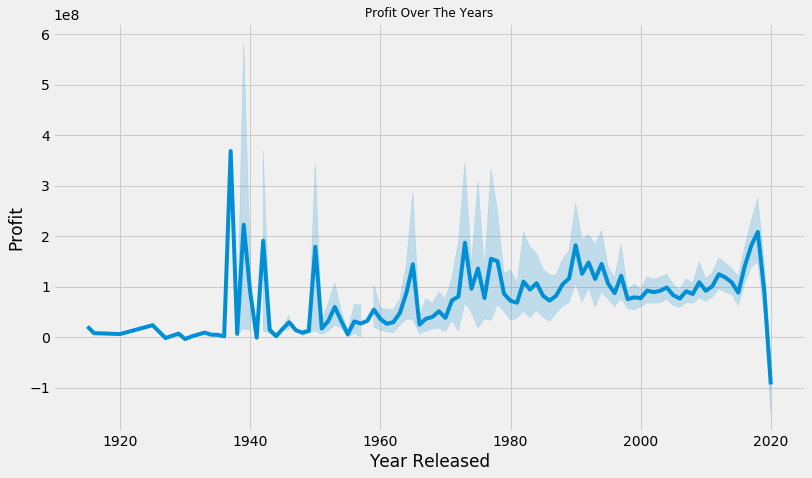

In [25]:
# Use a visulization to answer the question
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12, 7))
    sns.lineplot(x='release_year', y='profit', data=budget_df)
    plt.ylabel('Profit', fontsize=17)
    plt.xlabel('Year Released', fontsize=17)
    plt.title('Profit Over The Years',fontsize=12)
    plt.show()

**It seems that the profit made on movies over the years is not as great as you would expect.**

### Does it cost more to produce movies now?

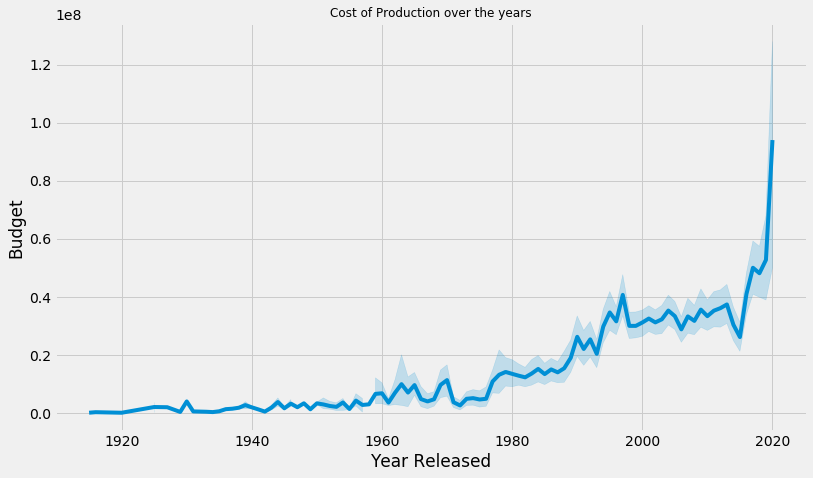

In [26]:
# Visualize data
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12, 7))
    sns.lineplot(x='release_year', y='production_budget', data=budget_df)
    plt.ylabel('Budget', fontsize=17)
    plt.xlabel('Year Released', fontsize=17)
    plt.title('Cost of Production over the years',fontsize=12)
    plt.show()

**The cost of producing a movie increased steadily over the past half-century.**

### Was it worth it?

In [27]:
# Write a function to help answer the question
def P(budget_df):
    if budget_df['profit'] > 0:
        val = 'Yes'
    else:
        val = 'No'
    return val

In [28]:
# Apply function to dataframe
budget_df['Worth_it?'] = budget_df.apply(P, axis=1)
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,Worth_it?
id,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,3111852904,Yes
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,876127750,Yes
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-157475300,No
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1531419831,Yes
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,1619903129,Yes


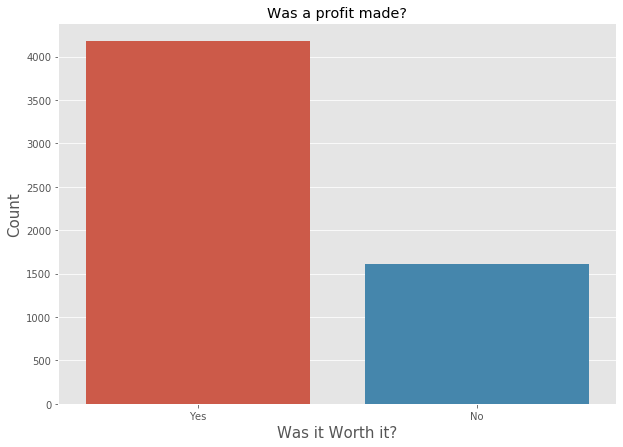

In [29]:
# Visualize answer
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 7))
    sns.countplot(x='Worth_it?', data=budget_df)
    plt.xlabel('Was it Worth it?', fontsize= 15)
    plt.ylabel('Count', fontsize=15)
    plt.title('Was a profit made?')
    plt.show()

### title_df Data Cleaning and EDA

In [30]:
# Convert sql table to pandas dataframe
title_df = pd.read_sql('''SELECT *
                                FROM imdb_title_basics''', conn)
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [31]:
# View data structure
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [32]:
# Check for null values
title_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [33]:
# Fill null values in 'runtime_minutes' with median to preserve data
title_df['runtime_minutes'].fillna(value=title_df['runtime_minutes'].median(), inplace=True)

In [34]:
# Drop all other null values
title_df.dropna(inplace=True)

In [35]:
# Confirm changes
title_df.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [36]:
# Set primary_title as index
title_df.set_index('tconst', inplace=True)

In [37]:
title_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
title_df[title_df.duplicated(keep=False)].sort_values(by='tconst')

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt10013288,The Promise,The Promise,2017,87.0,Drama
tt10042440,Untitled Marvel Film,Untitled Marvel Film,2021,87.0,Action
tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,87.0,Action
tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,87.0,Action
tt10064558,Untitled Marvel Film,Untitled Marvel Film,2021,87.0,Action
...,...,...,...,...,...
tt9660588,3. Elma,3. Elma,2014,65.0,Drama
tt9678524,Um fio de esperança: independência ou guerra n...,Um fio de esperança: independência ou guerra n...,2017,94.0,Documentary
tt9688944,Um fio de esperança: independência ou guerra n...,Um fio de esperança: independência ou guerra n...,2017,94.0,Documentary


In [39]:
# Delete duplicates
title_df.drop_duplicates(subset=['primary_title'], inplace=True)

# Confirm changes
title_df[title_df.duplicated(keep=False)].sort_values(by='tconst')

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,


### Has the average 'runtime_minutes' for movies increased over the years?

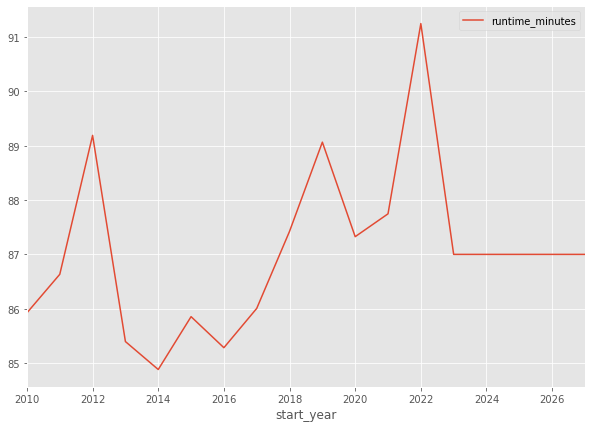

In [40]:
with plt.style.context('ggplot'):
    title_df.groupby(['start_year']).mean().plot(figsize=(10,7))

**The average runtime seems to have stayed constant over the years.**

### title_ratings_df Data Cleaning and EDA

In [41]:
# Convert ratings_df from sql table to pandas dataframe
ratings_df = pd.read_sql('''SELECT *
                                FROM title_ratings''', conn)
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [42]:
# Create new dataframe by merging title_df and ratings_df
title_ratings_df = pd.merge(title_df, ratings_df, on='tconst')
title_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [43]:
# Check for null values
title_ratings_df.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

### studio_df Data Cleaning and EDA

In [44]:
# Convert bom_movie_gross to pandas dataframe
studio_df = pd.read_sql('''SELECT *
                                FROM bom_movie_gross''', conn)
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [45]:
# View data structure
studio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [46]:
studio_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [47]:
# I want to convert the foreign_gross column to a float dtype but it has a lot of null data I do not wish to drop
# To make the transition smooth I will be filling all the null values with 0 temporarily
studio_df['foreign_gross'] = studio_df['foreign_gross'].fillna(value=0)

In [48]:
# Convert foreign_gross from object to int dtype
studio_df['foreign_gross'] = studio_df['foreign_gross'].str.replace('$','').str.replace(',','').astype('float')

In [49]:
# Confirm changes 
studio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [50]:
# Fill place holder with the the columns median value
studio_df['foreign_gross'] = studio_df['foreign_gross'].fillna(value=(studio_df['foreign_gross'].median()))

In [51]:
studio_df.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [52]:
# Drop null values in other columns
studio_df.dropna(inplace=True)

# Confirm changes
studio_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [53]:
# Create a column for total_gross
studio_df['total_gross'] = (studio_df['domestic_gross'] + studio_df['foreign_gross'])
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


### Now that the Data is clean we can get to answering our questions.

## Question 1: What Genre(s) should we pay the most attention to based on Popularity and Profit?

In [54]:
# We'll start by merging tmdb_movies_df, budget_df, and title_df
genre_df = pd.merge(pd.merge(tmdb_movies_df, title_df, on='original_title'),budget_df,left_on='original_title', right_on='movie')
genre_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release_month,...,runtime_minutes,genres,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,release_year,profit,Worth_it?
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,March,...,98.0,"Action,Adventure,Animation",2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,2010,547452224,Yes
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,May,...,124.0,"Action,Adventure,Sci-Fi",2010-05-07,Iron Man 2,170000000,312433331,621156389,2010,763589720,Yes
2,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,July,...,148.0,"Action,Adventure,Sci-Fi",2010-07-16,Inception,160000000,292576195,835524642,2010,968100837,Yes
3,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,February,...,118.0,"Adventure,Family,Fantasy",2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,2010,216819177,Yes
4,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,June,...,103.0,"Adventure,Animation,Comedy",2010-06-18,Toy Story 3,200000000,415004880,1068879522,2010,1283884402,Yes


In [55]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1792
Data columns (total 23 columns):
genre_ids            1793 non-null object
id                   1793 non-null int64
original_language    1793 non-null object
original_title       1793 non-null object
popularity           1793 non-null float64
release_date_x       1793 non-null datetime64[ns]
title                1793 non-null object
vote_average         1793 non-null float64
vote_count           1793 non-null int64
release_month        1793 non-null object
release_day          1793 non-null object
primary_title        1793 non-null object
start_year           1793 non-null int64
runtime_minutes      1793 non-null float64
genres               1793 non-null object
release_date_y       1793 non-null datetime64[ns]
movie                1793 non-null object
production_budget    1793 non-null int64
domestic_gross       1793 non-null int64
worldwide_gross      1793 non-null int64
release_year         1793 non-null int64

In [56]:
# There are a lot of duplicate columns we can go ahead and drop
genre_df.drop(['original_title', 'primary_title', 'movie', 'release_date_y', 'start_year', 'id'], axis=1, inplace=True)
genre_df.head()

,genre_ids,original_language,popularity,release_date_x,title,vote_average,vote_count,release_month,release_day,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,release_year,profit,Worth_it?
0,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,March,Friday,98.0,"Action,Adventure,Animation",165000000,217581232,494870992,2010,547452224,Yes
1,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368,May,Friday,124.0,"Action,Adventure,Sci-Fi",170000000,312433331,621156389,2010,763589720,Yes
2,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186,July,Friday,148.0,"Action,Adventure,Sci-Fi",160000000,292576195,835524642,2010,968100837,Yes
3,"[12, 14, 10751]",en,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,February,Thursday,118.0,"Adventure,Family,Fantasy",95000000,88768303,223050874,2010,216819177,Yes
4,"[16, 10751, 35]",en,24.445,2010-06-17,Toy Story 3,7.7,8340,June,Thursday,103.0,"Adventure,Animation,Comedy",200000000,415004880,1068879522,2010,1283884402,Yes


In [57]:
# Set 'title' as index
genre_df.set_index('title', inplace=True)
genre_df.head()

,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,release_month,release_day,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,release_year,profit,Worth_it?
title,,,,,,,,,,,,,,,,
How to Train Your Dragon,"[14, 12, 16, 10751]",en,28.734,2010-03-26,7.7,7610,March,Friday,98.0,"Action,Adventure,Animation",165000000,217581232,494870992,2010,547452224,Yes
Iron Man 2,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,May,Friday,124.0,"Action,Adventure,Sci-Fi",170000000,312433331,621156389,2010,763589720,Yes
Inception,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,July,Friday,148.0,"Action,Adventure,Sci-Fi",160000000,292576195,835524642,2010,968100837,Yes
Percy Jackson & the Olympians: The Lightning Thief,"[12, 14, 10751]",en,26.691,2010-02-11,6.1,4229,February,Thursday,118.0,"Adventure,Family,Fantasy",95000000,88768303,223050874,2010,216819177,Yes
Toy Story 3,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340,June,Thursday,103.0,"Adventure,Animation,Comedy",200000000,415004880,1068879522,2010,1283884402,Yes


### Top selling Genre(s) based on Popularity

In [58]:
df = genre_df.sort_values('popularity', ascending=False)
df.head()

# We want to see the most popular genre so we'll be limiting the amount of data to explore
popularity_df = df.iloc[:300].copy()
popularity_df.head()

,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,release_month,release_day,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,release_year,profit,Worth_it?
title,,,,,,,,,,,,,,,,
Avengers: Infinity War,"[12, 28, 14]",en,80.773,2018-04-27,8.3,13948,April,Friday,149.0,"Action,Adventure,Sci-Fi",300000000,678815482,2048134200,2018,2426949682,Yes
John Wick,"[28, 53]",en,78.123,2014-10-24,7.2,10081,October,Friday,101.0,"Action,Crime,Thriller",30000000,43037835,76235001,2014,89272836,Yes
The Hobbit: The Battle of the Five Armies,"[28, 12, 14]",en,53.783,2014-12-17,7.3,8392,December,Wednesday,144.0,"Adventure,Fantasy",250000000,255119788,945577621,2014,950697409,Yes
The Avengers,"[878, 28, 12]",en,50.289,2012-05-04,7.6,19673,May,Friday,143.0,"Action,Adventure,Sci-Fi",60000000,23385416,48585416,1998,11970832,Yes
The Avengers,"[878, 28, 12]",en,50.289,2012-05-04,7.6,19673,May,Friday,143.0,"Action,Adventure,Sci-Fi",225000000,623279547,1517935897,2012,1916215444,Yes


In [59]:
# Next we'll be working on extracting individual genres from dataframe
popularity_df['genres'] = popularity_df['genres'].map(lambda x: x.split(",") if x else x)

In [60]:
# Write a function to store genres in a list
genre_list =[]
none_counter = 0
for genre in popularity_df['genres']:
    genre_list += genre

In [61]:
# list all unique genres
unique_genre = set(genre_list)
unique_genre

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [62]:
# Get a count of how many movies in the dataset belongs to each genre
genre_count = {}
for g in unique_genre:
    genre_count[g] = genre_list.count(g)
genre_count

{'Drama': 82,
 'Music': 4,
 'Adventure': 158,
 'Comedy': 68,
 'War': 2,
 'Action': 170,
 'Sci-Fi': 64,
 'Horror': 26,
 'History': 5,
 'Western': 2,
 'Biography': 17,
 'Romance': 11,
 'Family': 18,
 'Crime': 42,
 'Fantasy': 43,
 'Musical': 1,
 'Animation': 35,
 'Thriller': 56,
 'Sport': 2,
 'Documentary': 3,
 'Mystery': 31}

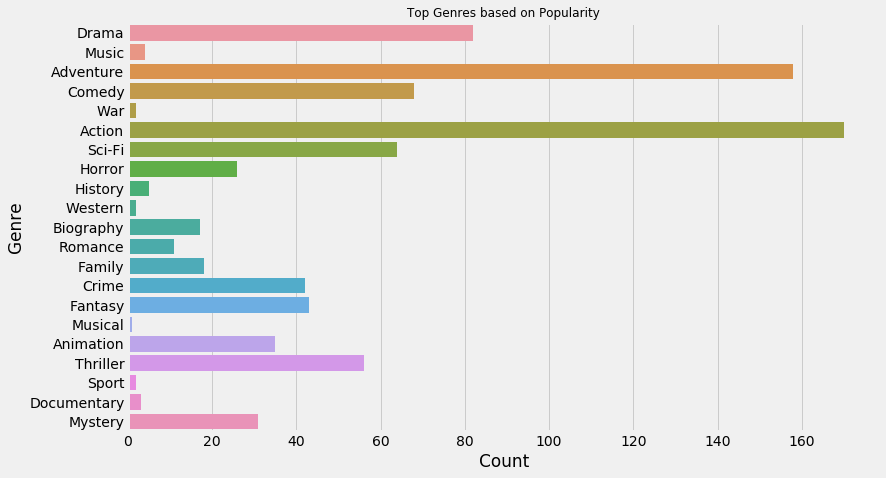

In [63]:
# Plot a vertical histogram to better understand the information

Genre = []
Count = []

for genre, count in genre_count.items():
    Genre.append(genre)
    Count.append(count)

# Plot graph
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12, 7))
    sns.barplot(Count, Genre)
    plt.title('Top Genres based on Popularity',fontsize=12)
    plt.xlabel('Count', fontsize=17)
    plt.ylabel('Genre', fontsize=17)
    plt.show()

**Looking at the graph it is obvious that Action takes the lead with Adventure right on it's heel. You can also tell that Westerns, Musicals, and War movies don't seem to go over well with the masses.**

### What genre makes the most profit?

In [64]:
df = genre_df.sort_values('profit', ascending=False)
df.head()

# We want to see the most popular genre based on profit so we'll be limiting the amount of data to explore
profit_df = df.iloc[:300].copy()
profit_df.head()

,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,release_month,release_day,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,release_year,profit,Worth_it?
title,,,,,,,,,,,,,,,,
Avengers: Infinity War,"[12, 28, 14]",en,80.773,2018-04-27,8.3,13948,April,Friday,149.0,"Action,Adventure,Sci-Fi",300000000,678815482,2048134200,2018,2426949682,Yes
Jurassic World,"[28, 12, 878, 53]",en,20.709,2015-06-12,6.6,14056,June,Friday,124.0,"Action,Adventure,Sci-Fi",215000000,652270625,1648854864,2015,2086125489,Yes
The Avengers,"[878, 28, 12]",en,50.289,2012-05-04,7.6,19673,May,Friday,143.0,"Action,Adventure,Sci-Fi",225000000,623279547,1517935897,2012,1916215444,Yes
Black Panther,"[28, 16]",en,2.058,2011-01-18,5.1,11,January,Tuesday,134.0,"Action,Adventure,Sci-Fi",200000000,700059566,1348258224,2018,1848317790,Yes
Incredibles 2,"[28, 12, 16, 10751]",en,36.286,2018-06-15,7.6,6354,June,Friday,118.0,"Action,Adventure,Animation",200000000,608581744,1242520711,2018,1651102455,Yes


In [65]:
# In the next few block we'll be repeating the same codes used in the popularity anaysis
profit_df['genres'] = profit_df['genres'].map(lambda x: x.split(",") if x else x)

In [66]:
# Write a function to store genres in a list
p_list =[]
none_counters = 0
for genre in profit_df['genres']:
    p_list += genre
    
    
# list all unique genres
profit_genres = set(p_list)
profit_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [67]:
# Get a count of how many movies in the dataset belongs to each genre
profit_count = {}
for g in profit_genres:
    profit_count[g] = p_list.count(g)
profit_count

{'Drama': 69,
 'Music': 4,
 'Adventure': 172,
 'Comedy': 105,
 'War': 1,
 'Action': 146,
 'Sci-Fi': 55,
 'Horror': 15,
 'History': 4,
 'Western': 2,
 'Biography': 15,
 'Romance': 18,
 'Family': 20,
 'Crime': 21,
 'Fantasy': 37,
 'Musical': 1,
 'Animation': 64,
 'Thriller': 44,
 'Sport': 3,
 'Documentary': 3,
 'Mystery': 21}

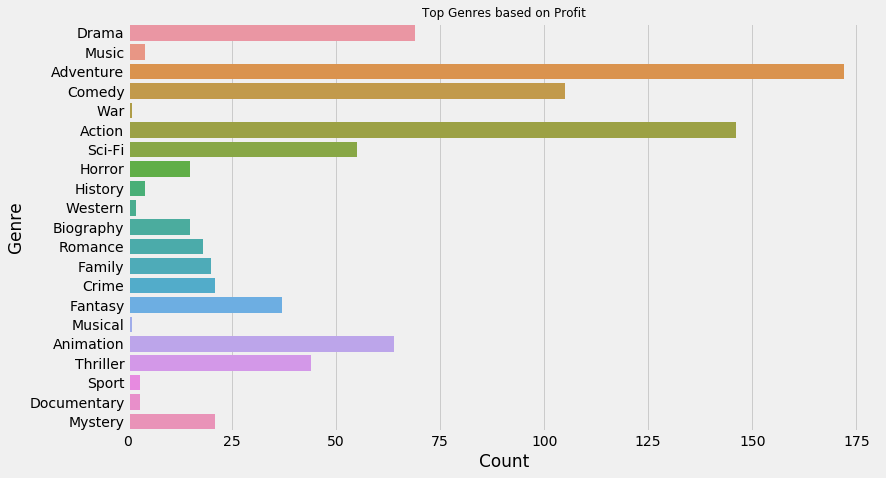

In [68]:
# Plot a vertical histogram to show results

profit_Genre = []
profit_Count = []

for genre, count in profit_count.items():
    profit_Genre.append(genre)
    profit_Count.append(count)

# Plot graph
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12, 7))
    sns.barplot(profit_Count, profit_Genre)
    plt.title('Top Genres based on Profit',fontsize=12)
    plt.xlabel('Count', fontsize=17)
    plt.ylabel('Genre', fontsize=17)
    plt.show()

**Once again Adventure and Action take point as the 2 most profitable genre.**

### Question 1: Conclusion
It's quite obvious that Adventure and Action are the genre to invest in based on Popularity and Profit

**Further Analysis**

What is the most popular Genre based on Popularity AND Budget.


## Question 2: What release month(s) and day(s) have the most popular movies

### Are movies released in certain months more popular?

In [69]:
# Categorize the months 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tmdb_movies_df['release_month'] = pd.Categorical(tmdb_movies_df['release_month'], categories=months, ordered=True)

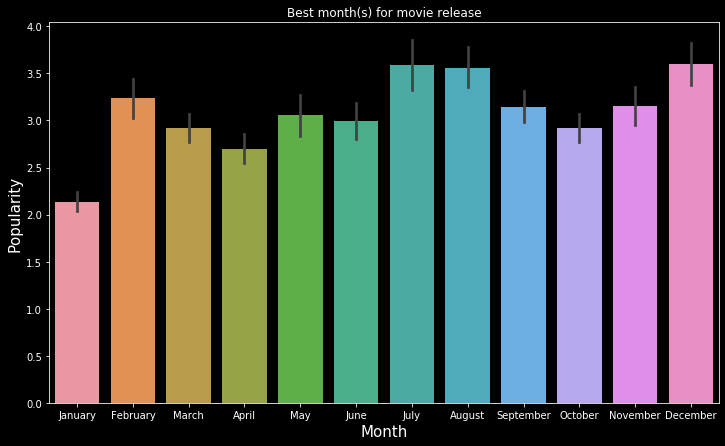

In [70]:
# Visualize the popularity of movies based on month released
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 7))
    sns.barplot(x='release_month', y='popularity', data=tmdb_movies_df)
    plt.xlabel('Month', fontsize= 15)
    plt.ylabel('Popularity', fontsize=15)
    plt.title('Best month(s) for movie release')
    plt.show()

**_July, August, and December_ look like the highest points on the graph. Based on the graph I would not conclude that the month released had a huge impact on the popularity of the movie.**

### What's the best day to release a movie?

In [71]:
# Categorize the days 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tmdb_movies_df['release_day'] = pd.Categorical(tmdb_movies_df['release_day'], categories=days, ordered=True)

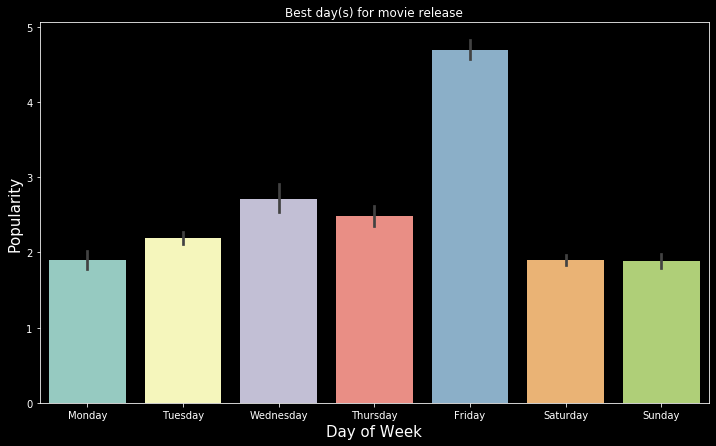

In [72]:
# Visualize the popularity of movies based on month released
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 7))
    sns.barplot(x='release_day', y='popularity', data=tmdb_movies_df)
    plt.xlabel('Day of Week', fontsize= 15)
    plt.ylabel('Popularity', fontsize=15)
    plt.title('Best day(s) for movie release')
    plt.show()

**Based on the graph it's very clear that movies released on Friday's are very popular**

### Question 2: Conclusion
Release month does not seem to have a lot of impact on the popularity of movies, but it seems the day of the week does.



## Question 3: What are the top grossing production studios?

In [73]:
# View studio_df
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [74]:
# Sort values from highest grossing
studio_df = studio_df.sort_values('total_gross', ascending=False)
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


In [75]:
# Make a list for the top 100 grossing studios
studio_name = []
for i in studio_df['studio'].head(100):
    studio_name.append(i)
studio_name

['BV',
 'BV',
 'BV',
 'WB',
 'BV',
 'Uni.',
 'BV',
 'BV',
 'BV',
 'BV',
 'Uni.',
 'BV',
 'WB',
 'P/DW',
 'Sony',
 'Par.',
 'WB',
 'BV',
 'BV',
 'BV',
 'Uni.',
 'BV',
 'BV',
 'BV',
 'WB (NL)',
 'Uni.',
 'BV',
 'Sony',
 'WB',
 'WB (NL)',
 'WB (NL)',
 'BV',
 'Fox',
 'Sony',
 'Sony',
 'Fox',
 'Uni.',
 'WB',
 'HC',
 'LGF',
 'BV',
 'BV',
 'Sony',
 'BV',
 'LG/S',
 'WB',
 'WB',
 'WB',
 'BV',
 'BV',
 'Par.',
 'Uni.',
 'Fox',
 'Fox',
 'BV',
 'BV',
 'Sony',
 'LGF',
 'P/DW',
 'Fox',
 'P/DW',
 'WB',
 'BV',
 'WB',
 'BV',
 'Sum.',
 'Fox',
 'Sony',
 'WB (NL)',
 'Sum.',
 'Par.',
 'LGF',
 'Par.',
 'BV',
 'BV',
 'Par.',
 'WB',
 'P/DW',
 'WB',
 'BV',
 'WB',
 'LGF',
 'Uni.',
 'BV',
 'BV',
 'Uni.',
 'Fox',
 'Uni.',
 'Sony',
 'Par.',
 'BV',
 'Fox',
 'Fox',
 'Fox',
 'Par.',
 'BV',
 'Fox',
 'WB',
 'WB',
 'WGUSA']

In [76]:
# Display all unique values
unique_studio = set(studio_name)
unique_studio

{'BV',
 'Fox',
 'HC',
 'LG/S',
 'LGF',
 'P/DW',
 'Par.',
 'Sony',
 'Sum.',
 'Uni.',
 'WB',
 'WB (NL)',
 'WGUSA'}

In [77]:
# Create a dictionary for unique values and counts
studio_count = {}
for s in studio_name:
    studio_count[s] = studio_name.count(s)
studio_count


{'BV': 33,
 'WB': 15,
 'Uni.': 9,
 'P/DW': 4,
 'Sony': 8,
 'Par.': 7,
 'WB (NL)': 4,
 'Fox': 11,
 'HC': 1,
 'LGF': 4,
 'LG/S': 1,
 'Sum.': 2,
 'WGUSA': 1}

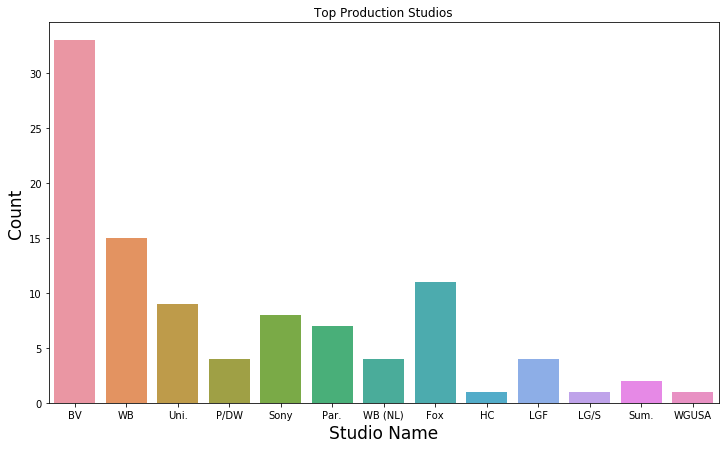

In [78]:
# Split data for visualization purposes
studio_names = []
s_count = []

for name, count in studio_count.items():
    studio_names.append(name)
    s_count.append(count)


# Visualize data
plt.figure(figsize=(12, 7))
sns.barplot(studio_names, s_count)
plt.title('Top Production Studios',fontsize=12)
plt.xlabel('Studio Name', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

**It seem that a collaboratin with BV or any of the other top ranking studios would be beneficial to the profit made**

### Question 3: Conclusion
Collaboration with other producing studios would be a great advantage.